In [98]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer, ENGLISH_STOP_WORDS

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle('fb_chat_history_sept_2009_oct_2020_test.pkl')

In [3]:
df_vivian = df[df['sender_name'] == 'Vivian Nguyen']

In [1]:
df_vivian.to_pickle('nguyen_vivian_sept_2009_oct_2020.pkl')

NameError: name 'df_vivian' is not defined

<AxesSubplot:>

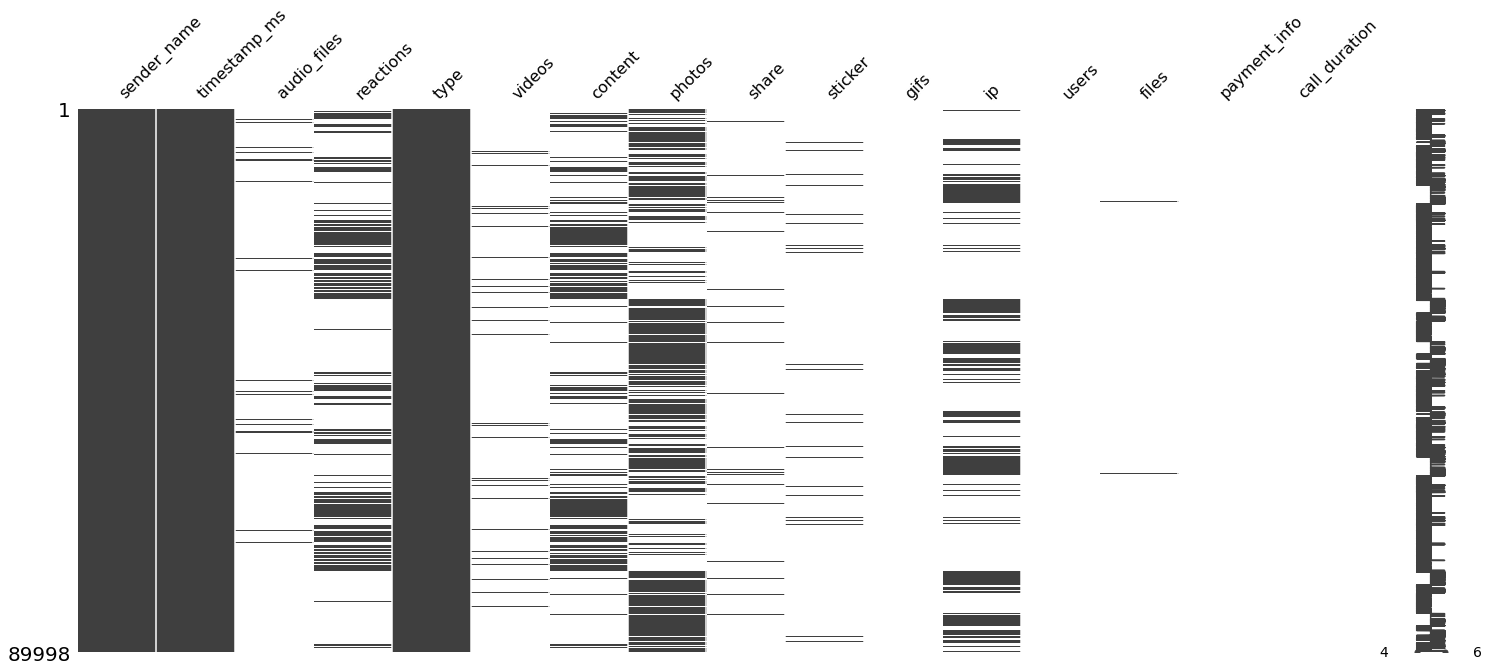

In [5]:
msno.matrix(df_vivian)

In [6]:
df_vivian_content = df_vivian['content'].dropna()

In [7]:
df_vivian_content

0       right now, i am spending time with Brooke, a l...
0            i have a code boot camp starting on the 24th
0                                     her hair is amazing
link        All i have is that one I put on instagram.com
0                                 I think about you a lot
                              ...                        
link          https://math.la.asu.edu/~carlson/deriv.html
link                              You sent an attachment.
link                              You sent an attachment.
0       Please let me know if there is anything I coul...
0       I don't really care where they go, but that I ...
Name: content, Length: 27280, dtype: object

In [19]:
# out of 90,000 messages, only about 27,000 of them are text based that I can use to teach a neural network my personality. 

# A serious contender for making any kind of generative neural network is going to be something out there that is already trained on conversation
# where instead I can incorporate my corpus of text and try to impart what my personality may be

In [78]:
def word_vectorizer(pd_series, stop_words=None, ngram_range=(1,1)):
    '''
    Processes a datatype of text: Series, DataFrame, List
    '''
    cv = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range)
    matrix = cv.fit_transform(df_vivian_content)
    freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])
    df_words = pd.DataFrame(freqs, columns=['word','count'])
    df_words.sort_values(by='count', ascending=False).head(20)
    return cv, df_words, matrix

In [9]:
object_cv, df_words, matrix = word_vectorizer(df_vivian_content)

In [10]:
df_words.sort_values(by='count', ascending=False).head(20)

,word,count
1257,and,8758
10748,you,8554
9699,to,7774
9551,the,7566
5535,it,5172
6943,of,5134
5518,is,4068
5302,in,3642
6680,my,3516
9545,that,3272


In [11]:
object_cv_stop, df_words_stop, matrix_stop = word_vectorizer(df_vivian_content, stop_words='english')

In [12]:
df_words_stop.sort_values(by='count', ascending=False).head(20)

,word,count
5023,https,2144
8384,sent,1978
5887,like,1946
2618,com,1638
1456,attachment,1464
5559,just,1318
10371,www,962
3424,don,878
4573,going,832
4446,gay,796


In [163]:
# Let's edit some of the stop words and get rid of those website references.

my_stop_words = ['sent', 'attachment', 'https', 'www', 'https', 'youtu', 'sent','link', 'http','www', 'youtube','com', 'com','watch', 
                 'instagram','com', 'google','com', 'www','instagram', 'www','youtube', 'com','post', 'tumblr','com', 'facebook','com',
                 'org','wiki', 'www','google', 'll']
#stop_words = ENGLISH_STOP_WORDS.union(my_stop_words)
stop_words = my_stop_words

In [164]:
object_cv, df_words, matrix = word_vectorizer(df_vivian_content, ngram_range=(1,1))
object_cv_stop, df_words_stop, matrix_stop = word_vectorizer(df_vivian_content, stop_words=stop_words, ngram_range=(1,1))

top_30 = df_words.sort_values(by='count', ascending=False).head(30)
top_30_stop = df_words_stop.sort_values(by='count', ascending=False).head(30)

In [165]:
top_30 = df_words.sort_values(by='count', ascending=False).head(30)
top_30_stop = df_words_stop.sort_values(by='count', ascending=False).head(30)

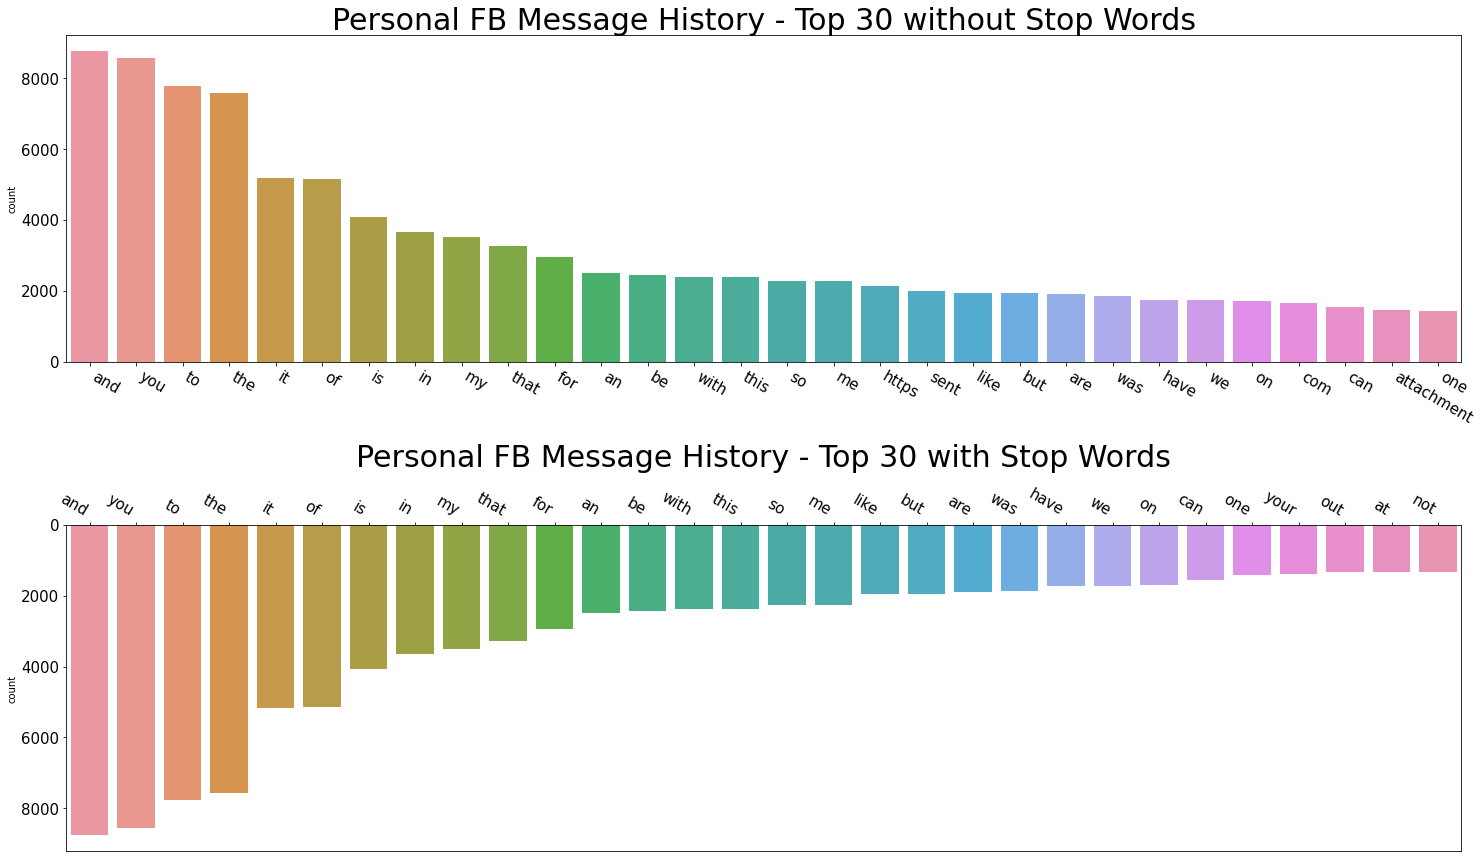

In [166]:
plt.figure(figsize=(25,15), facecolor='white')
plt.subplot(2,1,1)
sns.barplot(x=top_30['word'], y=top_30['count'])
plt.title('Personal FB Message History - Top 30 without Stop Words', fontsize=30)
plt.xticks(fontsize=15, rotation=-30, ha='left')
plt.yticks(fontsize=15)
plt.xlabel('')
#plt.savefig('top_30_w_stop.png')

plt.subplot(2,1,2)
sns.barplot(x=top_30_stop['word'], y=top_30_stop['count'])
plt.subplots_adjust(hspace=0.5)
plt.gca().invert_yaxis()
plt.title('Personal FB Message History - Top 30 with Stop Words', fontsize=30, pad=20)
plt.gca().xaxis.tick_top()
plt.xlabel('')
plt.xticks(fontsize=15, rotation=-30, ha='right')
plt.yticks(fontsize=15);
#plt.savefig('my_top30_with_without_stop.png', bbox_inches='tight')

In [167]:
object_cv_bi, df_words_bi, matrix_bi = word_vectorizer(df_vivian_content, ngram_range=(2,2))
object_cv_stop_bi, df_words_stop_bi, matrix_stop_bi = word_vectorizer(df_vivian_content, stop_words=stop_words, ngram_range=(2,2))

top_30_bi = df_words_bi.sort_values(by='count', ascending=False).head(30)
top_30_stop_bi = df_words_stop_bi.sort_values(by='count', ascending=False).head(30)

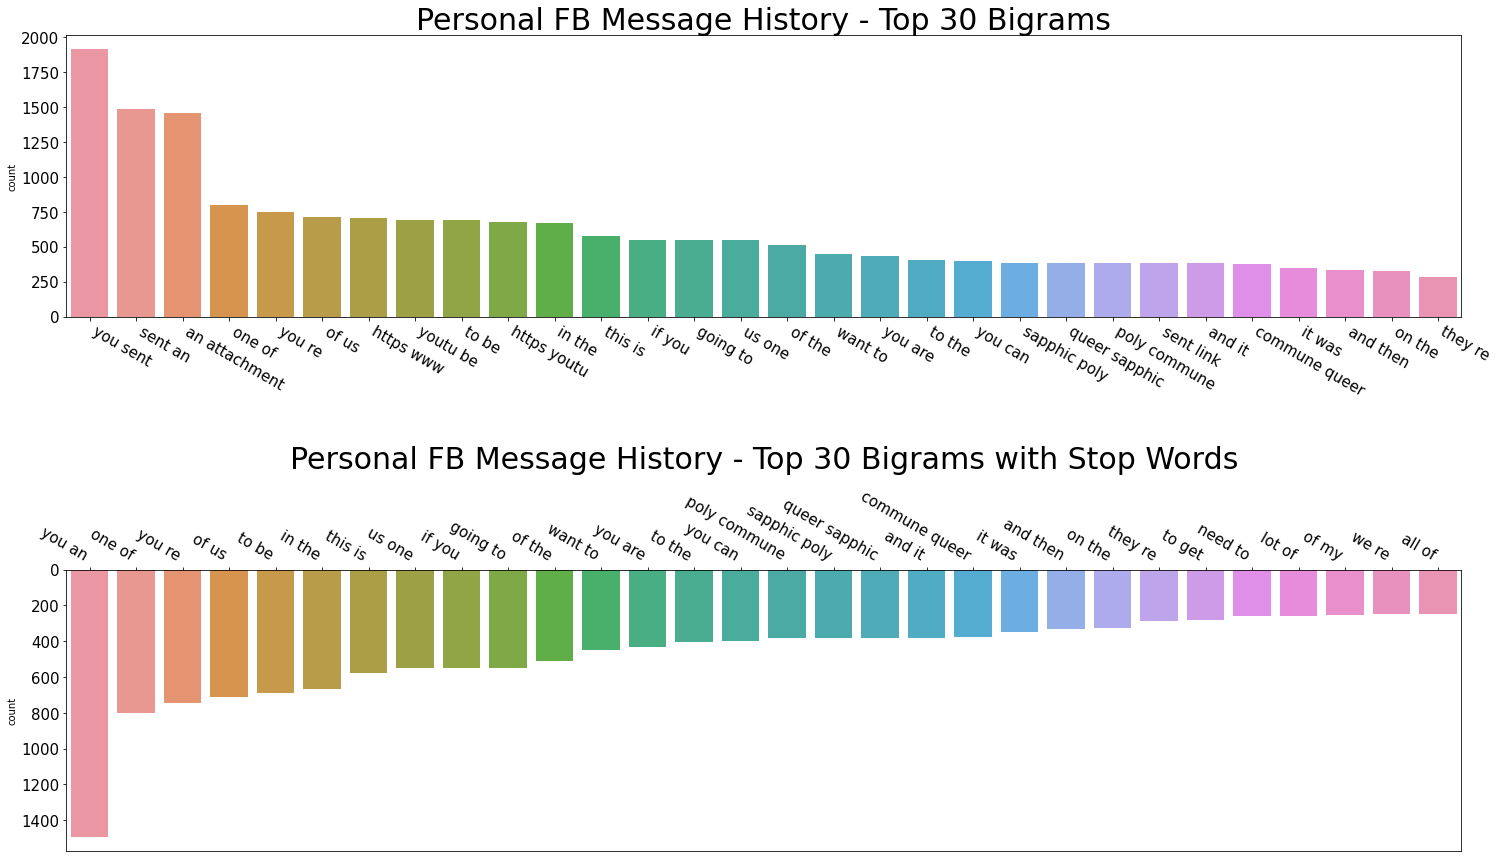

In [168]:
plt.figure(figsize=(25,15), facecolor='white')
plt.subplot(2,1,1)
sns.barplot(x=top_30_bi['word'], y=top_30_bi['count'])
plt.title('Personal FB Message History - Top 30 Bigrams', fontsize=30)
plt.xticks(fontsize=15, rotation=-30, ha='left')
plt.yticks(fontsize=15)
plt.xlabel('')
#plt.savefig('top_30_w_stop.png')

plt.subplot(2,1,2)
sns.barplot(x=top_30_stop_bi['word'], y=top_30_stop_bi['count'])
plt.subplots_adjust(hspace=0.9)
plt.gca().invert_yaxis()
plt.title('Personal FB Message History - Top 30 Bigrams with Stop Words', fontsize=30, pad=20)
plt.gca().xaxis.tick_top()
plt.xlabel('')
plt.xticks(fontsize=15, rotation=-30, ha='right')
plt.yticks(fontsize=15);
plt.savefig('my_top30_bi_with_without_stop.png', bbox_inches='tight')

In [169]:
# Let's check out trigrams

In [170]:
object_cv_tri, df_words_tri, matrix_tri = word_vectorizer(df_vivian_content, ngram_range=(3,3))
object_cv_stop_tri, df_words_stop_tri, matrix_stop_tri = word_vectorizer(df_vivian_content, stop_words=stop_words, ngram_range=(3,3))

top_30_tri = df_words_tri.sort_values(by='count', ascending=False).head(30)
top_30_stop_custom_tri = df_words_stop_tri.sort_values(by='count', ascending=False).head(30)

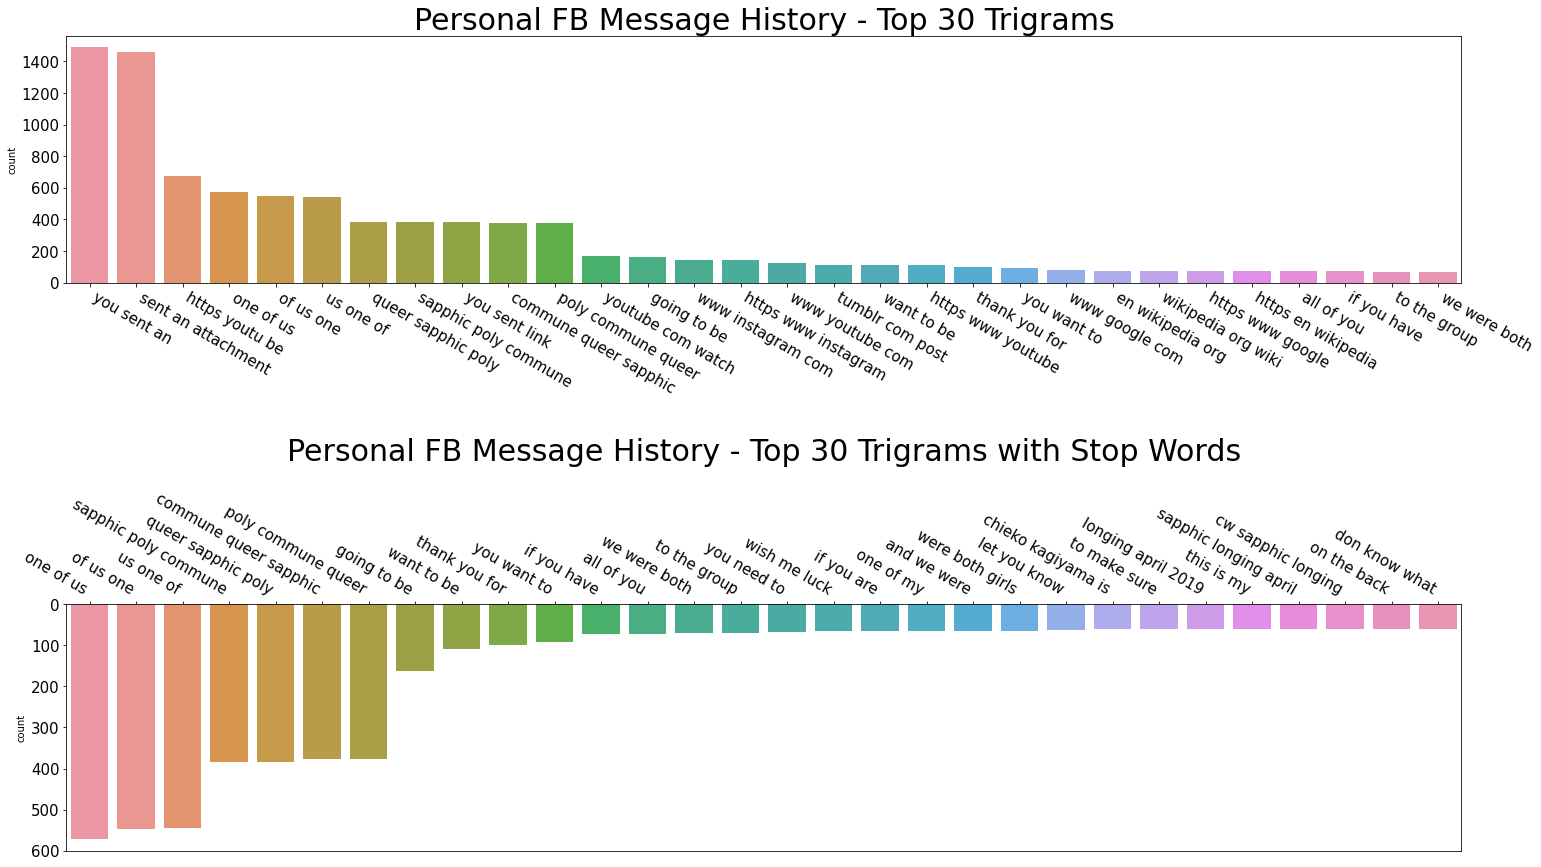

In [171]:
plt.figure(figsize=(25,15), facecolor='white')
plt.subplot(2,1,1)
sns.barplot(x=top_30_tri['word'], y=top_30_tri['count'])
plt.title('Personal FB Message History - Top 30 Trigrams', fontsize=30)
plt.xticks(fontsize=15, rotation=-30, ha='left')
plt.yticks(fontsize=15)
plt.xlabel('')
#plt.savefig('top_30_w_stop.png')

plt.subplot(2,1,2)
sns.barplot(x=top_30_stop_custom_tri['word'], y=top_30_stop_custom_tri['count'])
plt.subplots_adjust(hspace=1.3)
plt.gca().invert_yaxis()
plt.title('Personal FB Message History - Top 30 Trigrams with Stop Words', fontsize=30, pad=30)
plt.gca().xaxis.tick_top()
plt.xlabel('')
plt.xticks(fontsize=15, rotation=-30, ha='right')
plt.yticks(fontsize=15);
plt.savefig('my_top30_tri_with_without_stop.png', bbox_inches='tight')

In [172]:
object_cv_quad, df_words_quad, matrix_quad = word_vectorizer(df_vivian_content, ngram_range=(4,4))
object_cv_stop_quad, df_words_stop_quad, matrix_stop_quad = word_vectorizer(df_vivian_content, stop_words=stop_words, ngram_range=(4,4))

top_30_quad = df_words_quad.sort_values(by='count', ascending=False).head(30)
top_30_stop_custom_quad = df_words_stop_quad.sort_values(by='count', ascending=False).head(30)

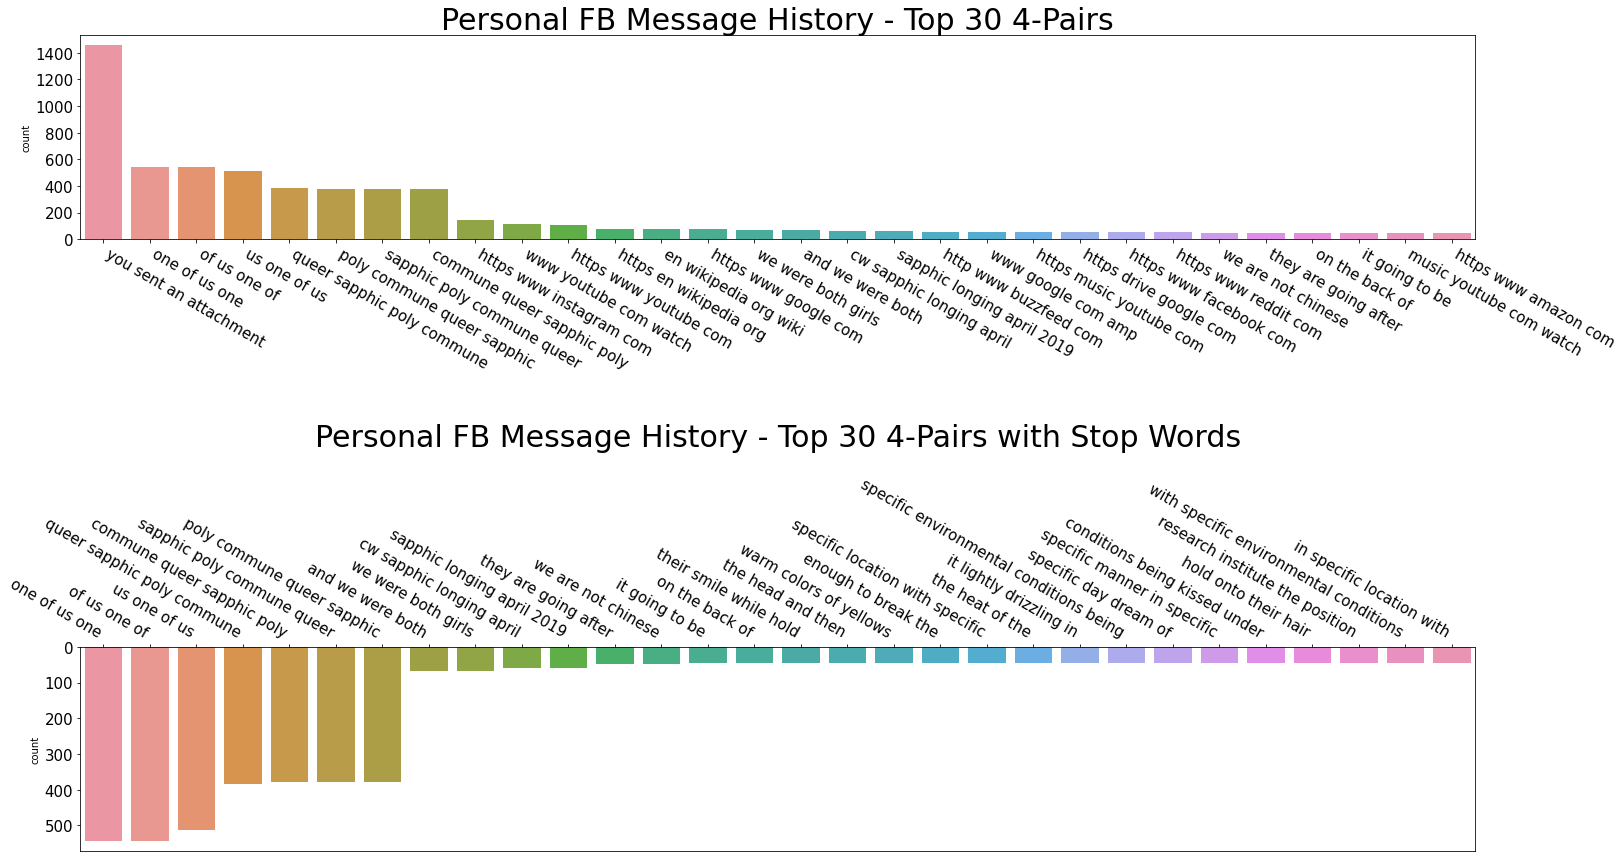

In [177]:
plt.figure(figsize=(25,15), facecolor='white')
plt.subplot(2,1,1)
sns.barplot(x=top_30_quad['word'], y=top_30_quad['count'])
plt.title('Personal FB Message History - Top 30 4-Pairs', fontsize=30)
plt.xticks(fontsize=15, rotation=-30, ha='left')
plt.yticks(fontsize=15)
plt.xlabel('')
#plt.savefig('top_30_w_stop.png')

plt.subplot(2,1,2)
sns.barplot(x=top_30_stop_custom_quad['word'], y=top_30_stop_custom_quad['count'])
plt.subplots_adjust(hspace=2)
plt.gca().invert_yaxis()
plt.title('Personal FB Message History - Top 30 4-Pairs with Stop Words', fontsize=30, pad=30)
plt.gca().xaxis.tick_top()
plt.xlabel('')
plt.xticks(fontsize=15, rotation=-30, ha='right')
plt.yticks(fontsize=15);
plt.savefig('my_top30_quad_with_without_stop.png', bbox_inches='tight')

In [174]:
object_cv_quint, df_words_quint, matrix_quint = word_vectorizer(df_vivian_content, ngram_range=(5,5))
object_cv_stop_quint, df_words_stop_quint, matrix_stop_quint = word_vectorizer(df_vivian_content, stop_words=stop_words, ngram_range=(5,5))

top_30_quint = df_words_quint.sort_values(by='count', ascending=False).head(30)
top_30_stop_custom_quint = df_words_stop_quint.sort_values(by='count', ascending=False).head(30)

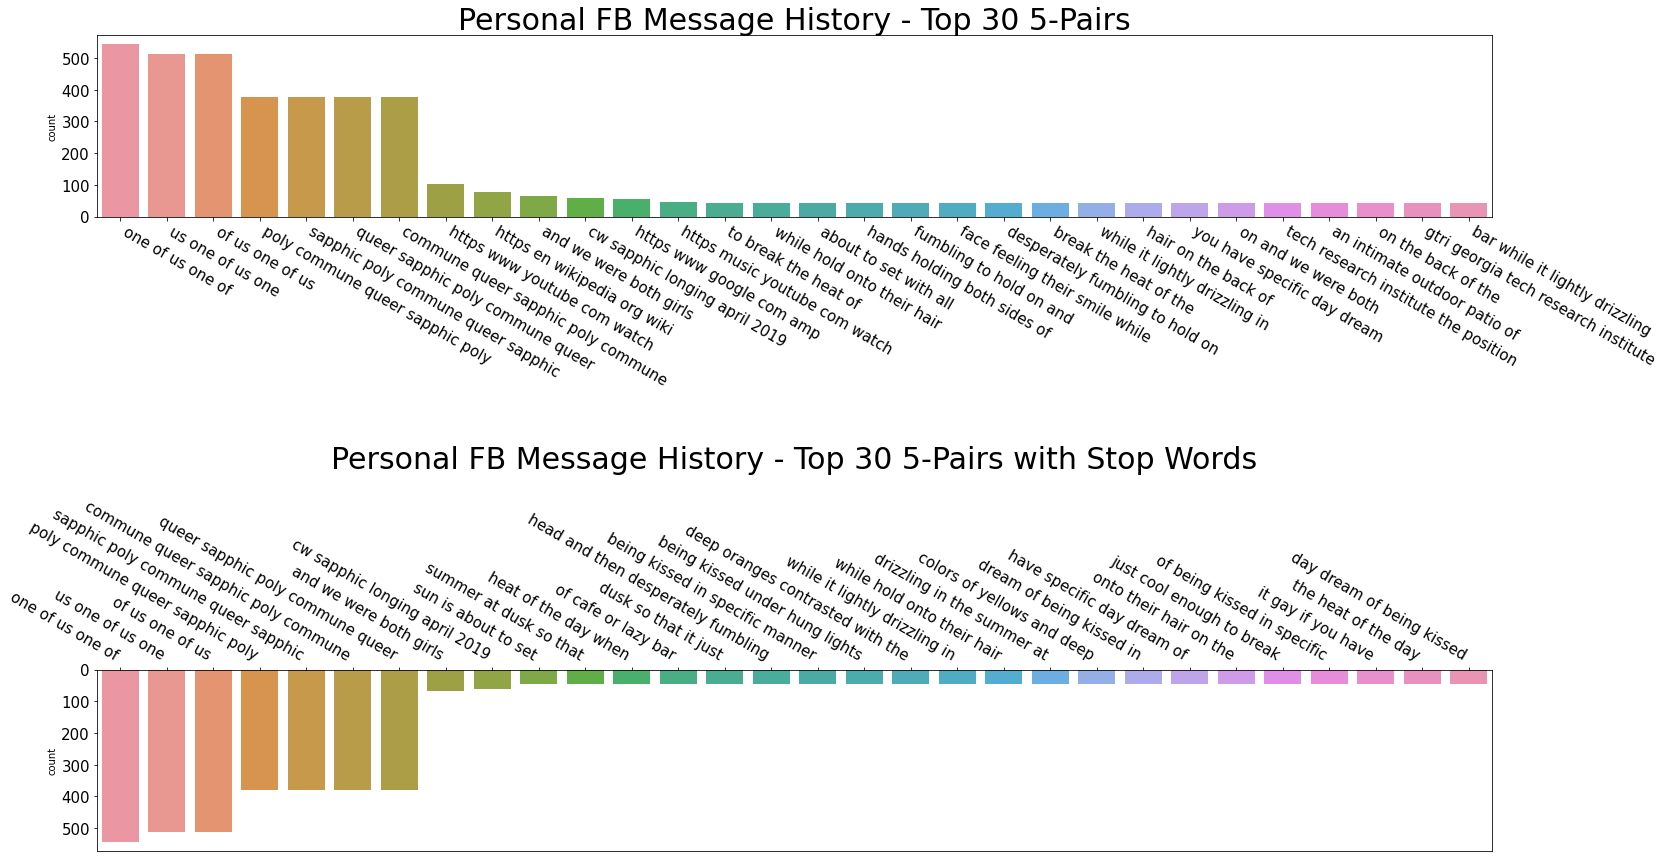

In [176]:
plt.figure(figsize=(25,15), facecolor='white')
plt.subplot(2,1,1)
sns.barplot(x=top_30_quint['word'], y=top_30_quint['count'])
plt.title('Personal FB Message History - Top 30 5-Pairs', fontsize=30)
plt.xticks(fontsize=15, rotation=-30, ha='left')
plt.yticks(fontsize=15)
plt.xlabel('')
#plt.savefig('top_30_w_stop.png')

plt.subplot(2,1,2)
sns.barplot(x=top_30_stop_custom_quint['word'], y=top_30_stop_custom_quint['count'])
plt.subplots_adjust(hspace=2.5)
plt.gca().invert_yaxis()
plt.title('Personal FB Message History - Top 30 5-Pairs with Stop Words', fontsize=30, pad=30)
plt.gca().xaxis.tick_top()
plt.xlabel('')
plt.xticks(fontsize=15, rotation=-30, ha='right')
plt.yticks(fontsize=15);
plt.savefig('my_top30_quint_with_without_stop.png', bbox_inches='tight')

In [218]:
[i for i in df_vivian['content'].dropna() if 'cw: sapphic' in i.lower()]

['CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril 2019',
 'CW: Sapphic Longing\nApril

In [223]:
df_vivian[df_vivian['content'] ==  'CW: Sapphic Longing\nApril 2019'][['content', 'photos']].iloc[0]['photos']

{'uri': 'messages/inbox/ladiesofsquat_ktjpfbjl9q/photos/96233048_980589689010409_1895076245444493312_n_980589685677076.jpg',
 'creation_timestamp': 1588828135}